 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
#from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns.csv, drop duplicates, drop null
whale_return = pd.read_csv('./Resources/whale_returns.csv').dropna().drop_duplicates()
# Setting index to Date
whale_return.set_index(pd.to_datetime(whale_return['Date'], infer_datetime_format=True), inplace=True)
# Dropping redundant date column
whale_return.drop(columns=['Date'], inplace=True)
whale_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [4]:
# Count nulls
whale_return.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
# Drop nulls
whale_return.drop_duplicates()
whale_return = whale_return.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns, drop duplicates, drop null
algo_return = pd.read_csv('./Resources/algo_returns.csv').drop_duplicates().dropna()
# Setting index to date
algo_return.set_index(pd.to_datetime(algo_return['Date'], infer_datetime_format=True), inplace=True)
# Dropping redundant date column
algo_return.drop(columns=['Date'], inplace=True)
algo_return.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [7]:
# Count nulls
algo_return.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [8]:
# Drop nulls
algo_return.drop_duplicates()
algo_return.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices, drop duplicates. drop null
sp500_history = pd.read_csv('./Resources/sp500_history.csv').drop_duplicates().dropna()
# Format and index by Date
sp500_history.set_index(pd.to_datetime(sp500_history['Date'], infer_datetime_format=True), inplace=True)
# Remove '$' from Close column
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')
sp500_history.head()

/var/folders/8l/w12pjc8j3j14ktkg34f88ltw0000gn/T/ipykernel_40960/4103077313.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')


,Date,Close
Date,,
2019-04-23,23-Apr-19,2933.68
2019-04-22,22-Apr-19,2907.97
2019-04-18,18-Apr-19,2905.03
2019-04-17,17-Apr-19,2900.45
2019-04-16,16-Apr-19,2907.06


In [10]:
# Check Data Types
sp500_history.dtypes

Date     object
Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_history = sp500_history.astype({'Close':float})
sp500_history.drop(columns=['Date'], inplace=True)

In [12]:
# Calculate Daily Returns
sp500_returns = sp500_history.pct_change().dropna()
sp500_returns

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [13]:
# Drop nulls
sp500_history.dropna()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={'Close': 'SP 500'})
sp500_returns.dropna()

,SP 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_return, algo_return, sp500_returns], axis= 'columns', join='inner')
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

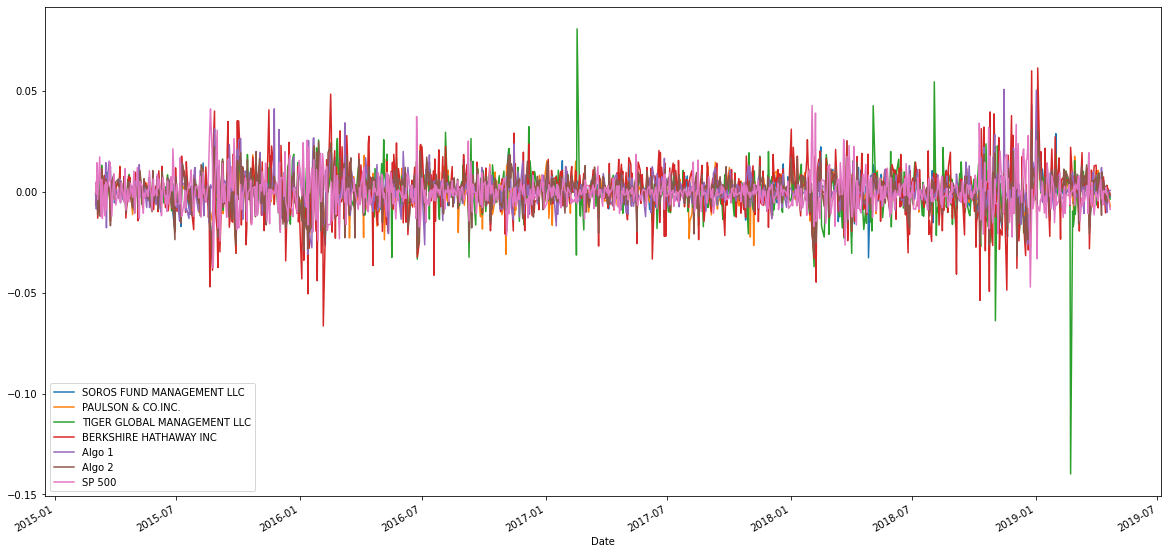

In [16]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(20, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

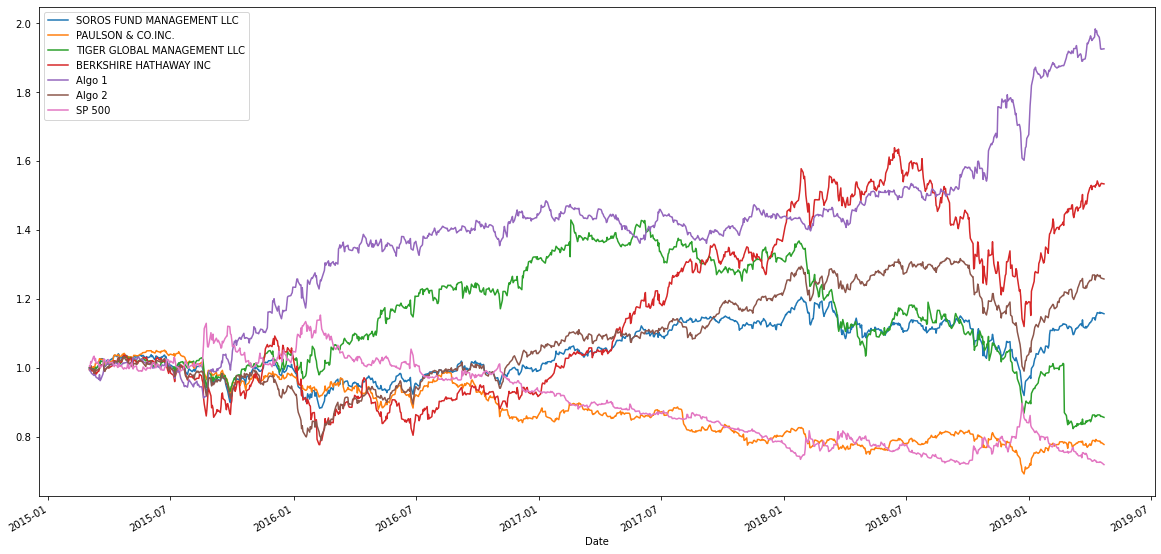

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_return = (1 + combined_returns).cumprod()
cumulative_return.head()
# Plot cumulative returns
cumulative_return.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

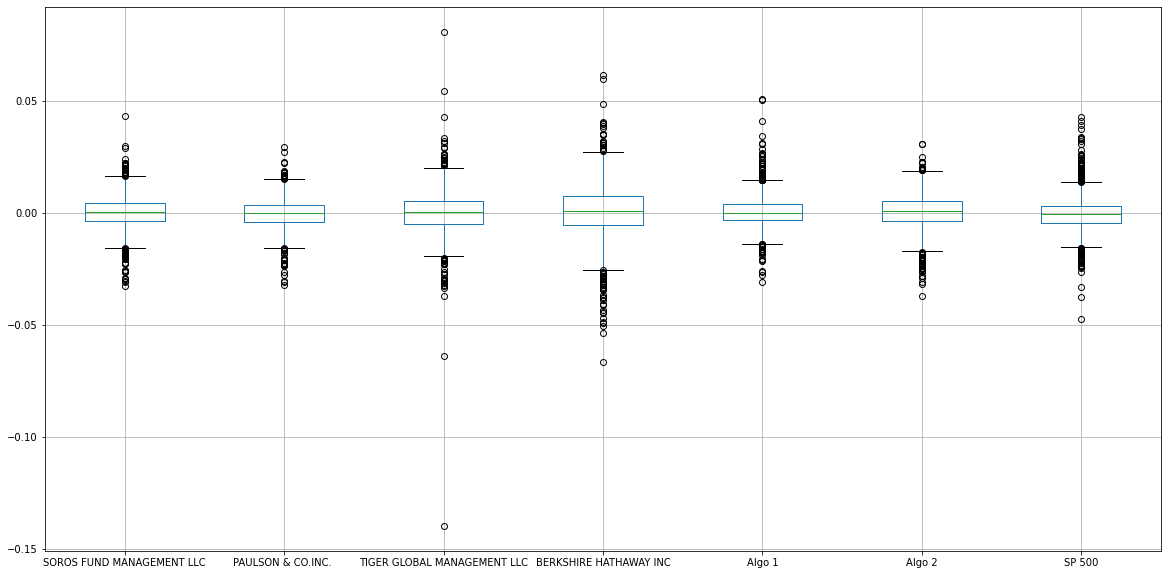

In [18]:
# Box plot to visually show risk
combined_returns.boxplot(figsize=(20, 10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP 500                         0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = sp500_returns.std()
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
SP 500                         0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
dtype: float64

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annulalized_std = daily_std * np.sqrt(252)
annulalized_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
SP 500                         0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

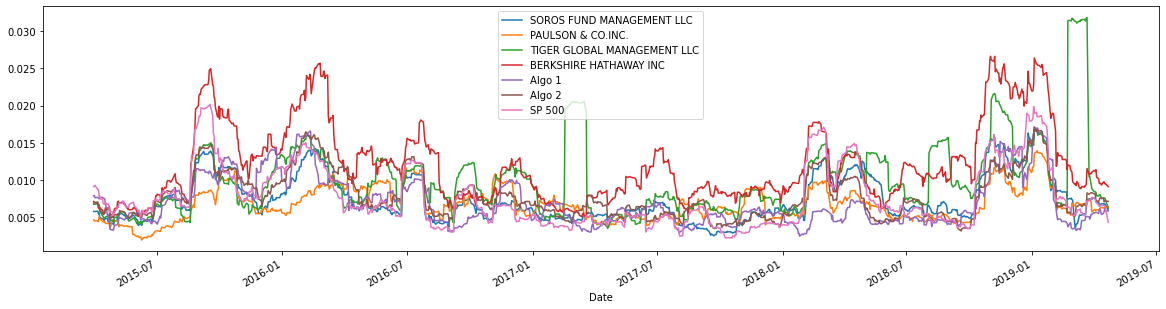

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21 = combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_21.plot(figsize=(20, 5))

### Calculate and plot the correlation

<AxesSubplot:>

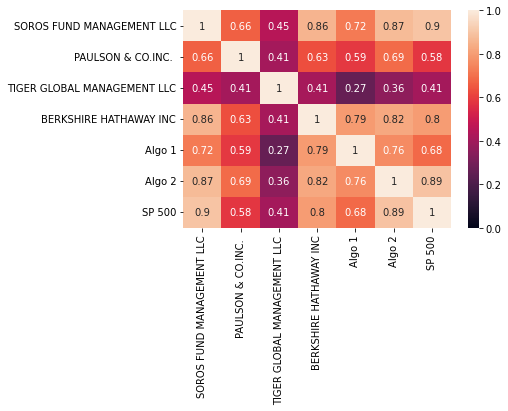

In [23]:
# Calculate the correlation
combined_correl = rolling_21.corr()
combined_correl
# Display de correlation matrix
sns.heatmap(combined_correl, vmin=0, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

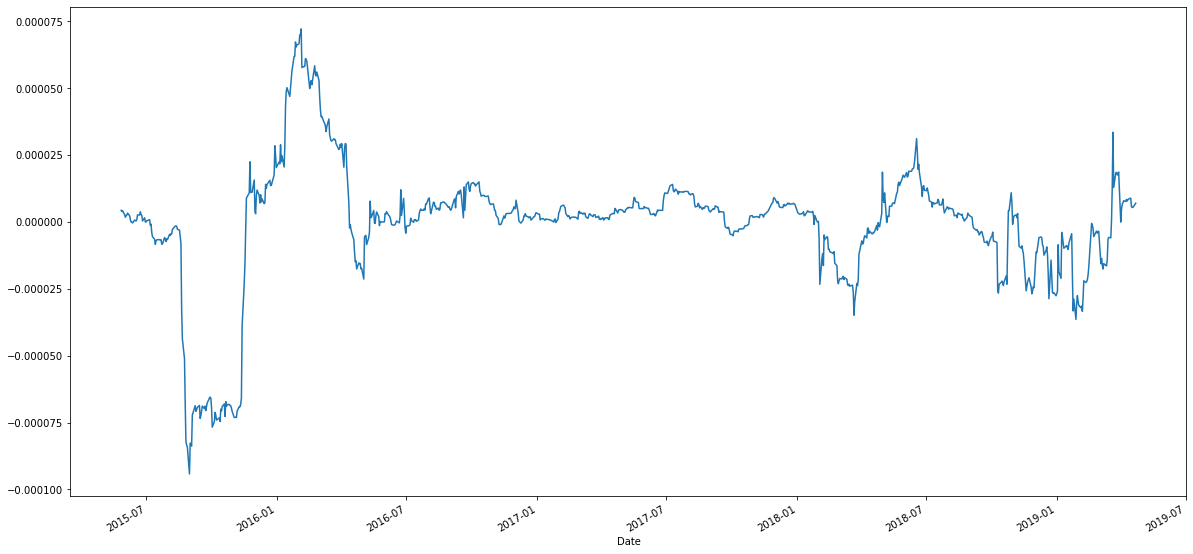

In [24]:
# Calculate covariance of a single portfolio
covariance_berk = combined_returns['BERKSHIRE HATHAWAY INC'].cov(combined_returns['SP 500'])
# Calculate variance of S&P 500
variance_sp = combined_returns['SP 500'].var()
# Computing beta
berk_beta = covariance_berk/variance_sp
# Plot beta trend
rolling_covari = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_returns['SP 500'])
rolling_covari.plot(figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

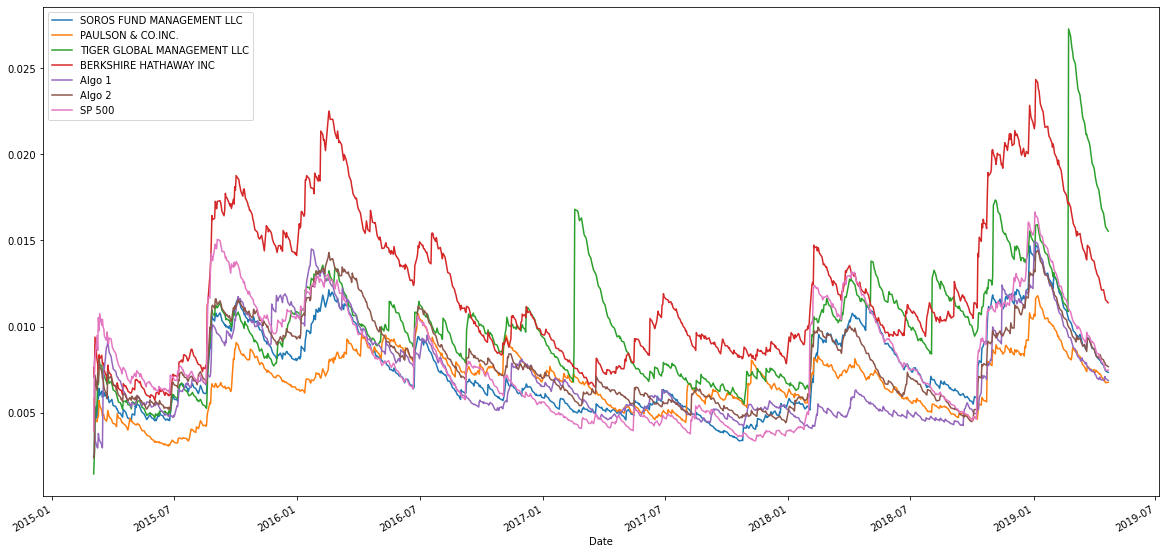

In [25]:
# Use `ewm` to calculate the rolling window
rolling_ewm = combined_returns.ewm(halflife=21).std().plot(figsize=(20, 10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharp_ratio = ((combined_returns.mean() * 252)) / (combined_returns.std() * np.sqrt(252))
sharp_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP 500                        -0.518582
dtype: float64

<AxesSubplot:>

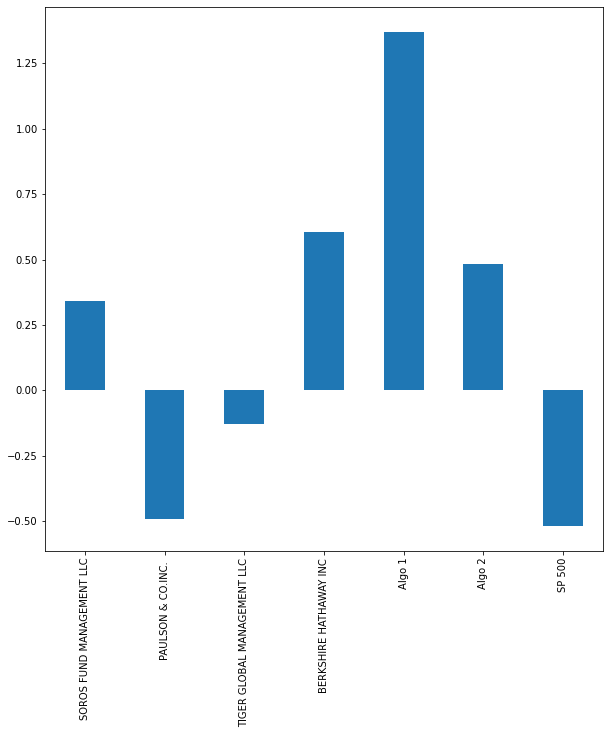

In [27]:
# Visualize the sharpe ratios as a bar plot
sharp_ratio.plot(kind='bar', figsize=(10, 10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 greatly outperformed all other portfolios including S&P 500. Berkshire only slightly outperformed algo 2 but considering how much algo 1 outperformed<br>
Berkshire both the algorithmic trading strategies did better than the rest including the S&P 500 market.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [116]:
# Reading data from 1st stock
aapl = pd.read_csv('./Resources/aapl_historical.csv').dropna()
aapl.rename(columns={'NOCP': 'AAPL'}, inplace=True)
aapl.set_index(pd.to_datetime(aapl['Trade DATE'], infer_datetime_format=True), inplace=True)
aapl

,Symbol,Trade DATE,AAPL
Trade DATE,,,
2019-05-09,AAPL,5/9/2019,200.72
2019-05-08,AAPL,5/8/2019,202.90
2019-05-07,AAPL,5/7/2019,202.86
2019-05-06,AAPL,5/6/2019,208.48
2019-05-03,AAPL,5/3/2019,211.75
...,...,...,...
2018-05-17,AAPL,5/17/2018,186.99
2018-05-16,AAPL,5/16/2018,188.18
2018-05-15,AAPL,5/15/2018,186.44


In [117]:
# Reading data from 2nd stock
cost = pd.read_csv('./Resources/cost_historical.csv').dropna()
cost.rename(columns={'NOCP': 'COST'}, inplace=True)
cost.set_index(pd.to_datetime(cost['Trade DATE'], infer_datetime_format=True), inplace=True)
cost

,Symbol,Trade DATE,COST
Trade DATE,,,
2019-05-09,COST,5/9/2019,243.47
2019-05-08,COST,5/8/2019,241.34
2019-05-07,COST,5/7/2019,240.18
2019-05-06,COST,5/6/2019,244.23
2019-05-03,COST,5/3/2019,244.62
...,...,...,...
2018-05-17,COST,5/17/2018,199.60
2018-05-16,COST,5/16/2018,198.71
2018-05-15,COST,5/15/2018,195.48


In [118]:
# Reading data from 3rd stock
goog = pd.read_csv('./Resources/goog_historical.csv').dropna()
goog.rename(columns={'NOCP' : 'GOOG'}, inplace=True)
goog.set_index(pd.to_datetime(goog['Trade DATE'], infer_datetime_format=True), inplace=True)
goog

,Symbol,Trade DATE,GOOG
Trade DATE,,,
2019-05-09,GOOG,5/9/2019,1162.38
2019-05-08,GOOG,5/8/2019,1166.27
2019-05-07,GOOG,5/7/2019,1174.10
2019-05-06,GOOG,5/6/2019,1189.39
2019-05-03,GOOG,5/3/2019,1185.40
...,...,...,...
2018-05-17,GOOG,5/17/2018,1078.59
2018-05-16,GOOG,5/16/2018,1081.77
2018-05-15,GOOG,5/15/2018,1079.23


In [119]:
# Combine all stocks in a single DataFrame
portfo_combine = pd.concat([aapl, cost, goog], axis= 'columns', join= 'inner')
portfo_combine.drop(columns=['Trade DATE'], inplace=True)
portfo_combine

,Symbol,AAPL,Symbol,COST,Symbol,GOOG
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38
2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40
...,...,...,...,...,...,...
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23


In [120]:
# Reset Date index
portfo_combine.reset_index
portfo_combine

,Symbol,AAPL,Symbol,COST,Symbol,GOOG
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38
2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40
...,...,...,...,...,...,...
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23


In [121]:
# Reorganize portfolio data by having a column per symbol
portfo_combine.drop(columns=['Symbol'], inplace=True)
portfo_combine

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40
...,...,...,...
2018-05-17,186.99,199.60,1078.59
2018-05-16,188.18,198.71,1081.77
2018-05-15,186.44,195.48,1079.23


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!